In [171]:
import mne
import numpy as np
import scipy.io
from mne.io import RawArray, Raw
from mne.channels import make_standard_montage
from mne import create_info
import matplotlib.pyplot as plt

In [172]:
path = r"E:\MNE-tsinghua-data\upload\yijun\S1.mat"
raw_mat = scipy.io.loadmat(path)

In [173]:
epoch_data = raw_mat["data"] * 1e-6
epoch_data.shape

(64, 1500, 40, 6)

In [174]:
stim = np.zeros((1, *epoch_data.shape[1:]))
stim.shape

(1, 1500, 40, 6)

In [175]:
stim[0, 125] = np.tile(
            np.arange(1, 41)[:, np.newaxis], (1, epoch_data.shape[-1])
        )
stim

array([[[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0.

In [176]:
epoch_data = np.concatenate((epoch_data, stim), axis=0)
epoch_data.shape

(65, 1500, 40, 6)

In [177]:
data = np.transpose(epoch_data, (0, 3, 2, 1))
data.shape

(65, 6, 40, 1500)

In [178]:
montage = make_standard_montage("standard_1005")
montage.rename_channels(
    {ch_name: ch_name.upper() for ch_name in montage.ch_names}
)
montage

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 343 channels>

In [179]:
_CHANNELS = ["FP1","FPZ","FP2","AF3","AF4","F7","F5","F3","F1","FZ","F2","F4","F6","F8","FT7","FC5","FC3","FC1","FCZ","FC2","FC4","FC6","FT8","T7","C5","C3","C1","CZ","C2","C4","C6","T8","TP7","CP5","CP3","CP1","CPZ","CP2","CP4","CP6","TP8","P7","P5","P3","P1","PZ","P2","P4","P6","P8","PO7","PO5","PO3","POZ","PO4","PO6","PO8","O1","OZ","O2"]
ch_names = [ch_name.upper() for ch_name in _CHANNELS]
ch_names.insert(32, "M1")
ch_names.insert(42, "M2")
ch_names.insert(59, "CB1")
ch_names = ch_names + ["CB2", "STI 014"]
ch_types = ["eeg"] * 65
ch_types[59] = "misc"
ch_types[63] = "misc"
ch_types[-1] = "stim"

In [180]:
info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=250)
info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 62 EEG, 2 misc, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 65
 projs: []
 sfreq: 250.0 Hz
>

In [181]:
raw = RawArray(
        data=np.reshape(data, (data.shape[0], -1)), 
        info=info
    )
raw.set_montage(montage)
raw.filter(5, 90, l_trans_bandwidth=2,h_trans_bandwidth=5,
        phase='zero-double')

Creating RawArray with float64 data, n_channels=65, n_times=360000
    Range : 0 ... 359999 =      0.000 ...  1439.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 90 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-12 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 5.00 Hz (-12 dB cutoff frequency: 92.50 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.5s finished


<RawArray | 65 x 360000 (1440.0 s), ~178.6 MB, data loaded>

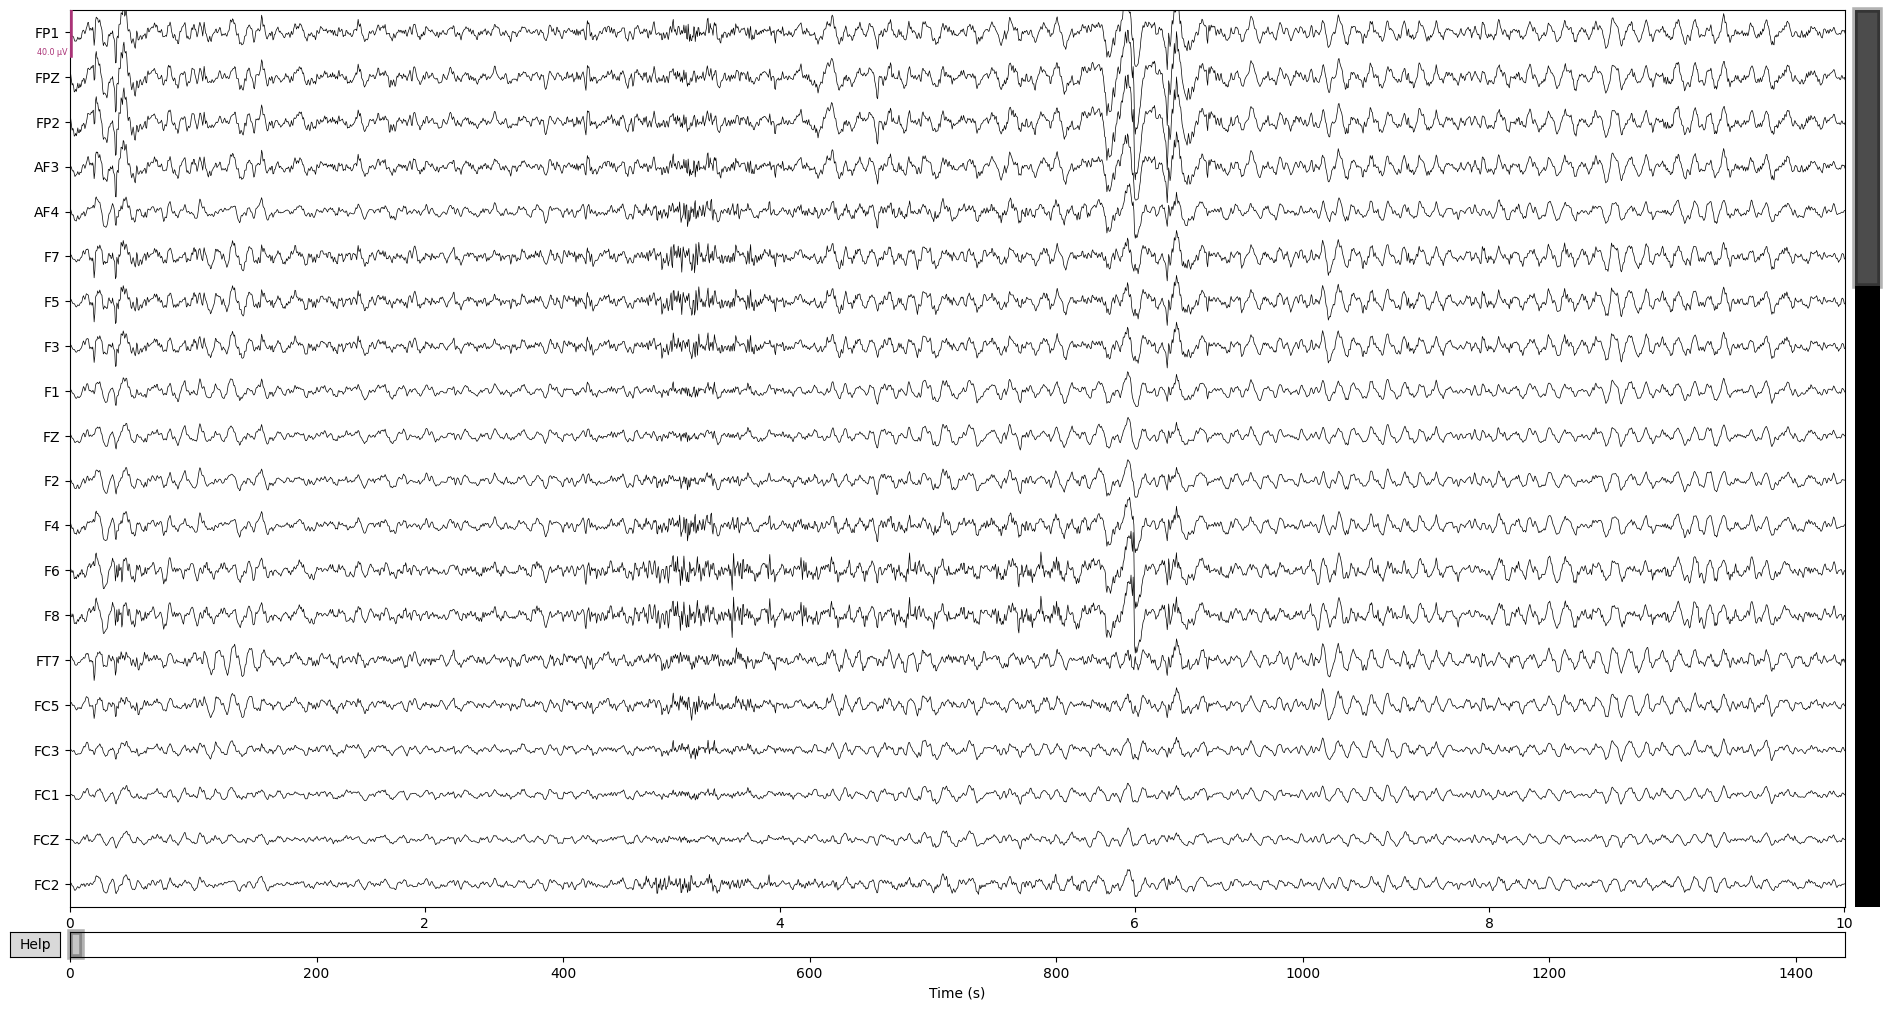

Effective window size : 1.024 (s)


c:\Users\Sunsun\.virtualenvs\HybridSpeller-q8UBACmb\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


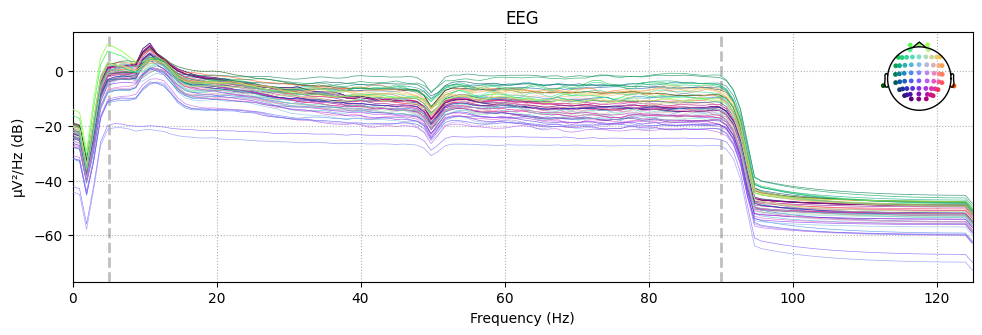

In [182]:
raw.plot()
plt.show()
raw.compute_psd().plot()
plt.show()

In [183]:
events = mne.find_events(raw)
channels = ['POZ', 'PZ', 'PO3', 'PO5', 'PO4', 'PO6', 'O1', 'OZ', 'O2']
picks = mne.pick_channels(raw.ch_names, channels, ordered=True)
epochs = mne.Epochs(raw=raw,events=events, baseline=None, tmin=0.14, tmax=0.636, reject=None, reject_by_annotation=False, picks=picks)

240 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated


In [184]:
epochs.get_data().shape

Using data from preloaded Raw for 240 events and 125 original time points ...
0 bad epochs dropped


(240, 9, 125)

In [185]:
from numpy import ndarray
import numpy as np
from scipy.sparse import vstack, identity, spmatrix
from typing import Optional, cast, Union
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from joblib import Parallel, delayed
from functools import partial



def _ged_wong(
    Z: ndarray,
    D: Optional[ndarray] = None,
    P: Optional[ndarray] = None,
    n_components=1,
    method="type1",
):
    if method != "type1" and method != "type2":
        raise ValueError("not supported method type")

    A = Z
    if D is not None:
        A = D.T @ A
    if P is not None:
        A = P.T @ A
    A = A.T @ A
    if method == "type1":
        B = Z
        if D is not None:
            B = D.T @ Z
        B = B.T @ B
        if isinstance(A, spmatrix) or isinstance(B, spmatrix):
            D, W = eigsh(A, k=n_components, M=B)
        else:
            D, W = eigh(A, B)
    elif method == "type2":
        if isinstance(A, spmatrix):
            D, W = eigsh(A, k=n_components)
        else:
            D, W = eigh(A)

    D_exist = cast(ndarray, D)
    ind = np.argsort(D_exist)[::-1]
    D_exist, W = D_exist[ind], W[:, ind]
    return D_exist[:n_components], W[:, :n_components]


def _trca_kernel(X: ndarray):
    """TRCA.
    X: (n_trials, n_channels, n_samples)
    """
    X = np.reshape(X, (-1, *X.shape[-2:]))
    M, C, N = X.shape
    n_components = C
    P = vstack([identity(N) for _ in range(M)])
    P = P @ P.T
    Z = np.hstack(X).T  # type: ignore
    _, U = _ged_wong(Z, None, P, n_components=n_components)  # U for X
    return U


def _trca_feature(
    X: ndarray,
    templates: ndarray,
    Us: ndarray,
    n_components: int = 1,
    ensemble: bool = True,
):
    rhos = []
    if not ensemble:
        for Xk, U in zip(templates, Us):
            a = U[:, :n_components].T @ X
            b = U[:, :n_components].T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    else:
        U = Us[:, :, :n_components]
        U = np.concatenate(U, axis=-1)
        for Xk in templates:
            a = U.T @ X
            b = U.T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    return rhos


class TRCA(BaseEstimator, TransformerMixin, ClassifierMixin):
    def __init__(
        self, n_components: int = 1, ensemble: bool = True, n_jobs: Optional[int] = None
    ):
        self.n_components = n_components
        self.ensemble = ensemble
        self.n_jobs = n_jobs

    def fit(self, X: ndarray, y: ndarray, Yf: Optional[ndarray] = None):
        self.classes_ = np.unique(y)
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        self.templates_ = np.stack(
            [np.mean(X[y == label], axis=0) for label in self.classes_]
        )

        self.Us_ = np.stack([_trca_kernel(X[y == label]) for label in self.classes_])
        return self

    def transform(self, X: ndarray):
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        n_components = self.n_components
        templates = self.templates_
        Us = self.Us_
        ensemble = self.ensemble
        rhos = Parallel(n_jobs=self.n_jobs)(
            delayed(
                partial(
                    _trca_feature, Us=Us, n_components=n_components, ensemble=ensemble
                )
            )(a, templates)
            for a in X
        )
        rhos = np.stack(rhos)
        return rhos

    def predict(self, X: ndarray):
        feat = self.transform(X)
        labels = self.classes_[np.argmax(feat, axis=-1)]
        return labels, feat


def generate_cca_references(
    freqs,
    srate,
    T,
    phases: Optional[Union[ndarray, int, float]] = None,
    n_harmonics: int = 1,
):
    if isinstance(freqs, int) or isinstance(freqs, float):
        freqs = [freqs]
    freqs = np.array(freqs)[:, np.newaxis]
    if phases is None:
        phases = 0
    if isinstance(phases, int) or isinstance(phases, float):
        phases = np.array([phases])
    phases = np.array(phases)[:, np.newaxis]
    t = np.linspace(0, T, int(T * srate))

    Yf = []
    for i in range(n_harmonics):
        Yf.append(
            np.stack(
                [
                    np.sin(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                    np.cos(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                ],
                axis=1,
            )
        )
    Yf = np.concatenate(Yf, axis=1)
    return Yf

In [186]:
X = epochs.get_data()[:,:-1,:-1]
dropped_epochs = [n for n, dl in enumerate(epochs.drop_log) if len(dl)]  # result is a list
print(dropped_epochs)

Using data from preloaded Raw for 240 events and 125 original time points ...
[]


In [187]:
print(dropped_epochs)

[]


In [188]:
import numpy as np

events = np.delete(events, dropped_epochs, axis=0)
events[:,-1].shape

(240,)

In [189]:
y = events[:,-1]

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [191]:
from sklearn.utils import shuffle

# FREQS = [8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
# PHASES = [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80 ]
FREQS = [8,9,10,11,12,13,14,15,8.2,9.2,10.2,11.2,12.2,13.2,14.2,15.2,8.4,9.4,10.4,11.4,12.4,13.4,14.4,15.4,8.6,9.6,10.6,11.6,12.6,13.6,14.6,15.6,8.8,9.8,10.8,11.8,12.8,13.8,14.8,15.8]
PHASES = [0,0.5,1,1.5,0,0.5,1,1.5,0.5,1,1.5,0,0.5,1,1.5,0,1,1.5,0,0.5,1,1.5,0,0.5,1.5,0,0.5,1,1.5,0,0.5,1,0,0.5,1,1.5,0,0.5,1,1.5]

Yf = generate_cca_references(freqs=FREQS, srate=250, T=3.7, phases=PHASES, n_harmonics=5)
# Yf = generate_cca_references(freqs=FREQS, srate=250, T=3, phases=PHASES, n_harmonics=5)

estimator=TRCA(n_components = 1, n_jobs=-1)

model = estimator.fit(X_train, y_train, Yf)
X_test, y_test = shuffle(X_test, y_test)
preds, _ = model.predict(X_test)
acc = np.mean(preds==y_test)
print(preds)
print(y_test)
print(acc)

[ 8  9  2 21 38 38 35 28 39  4 17 39 29 10  4 35 26  4 18 32 22 24 22 25
 15 15 32 26 12 29 19 29 18 21  3 38 14 19 26 36 16 31 21 38 34 14 37 36
 31 12 14 34 39 32 28 20 30 36 12 29  2 27 27 19 21  3 21 20  1  1 33 23]
[ 8  9  2 21 38 38 35 28 39 13 17 24 29 10  4 20 26 24 18  7 22 24 22 25
 15 15 32 26 12 35 19 29 18  6  3 38 14 19 11 23 36 31  6 38  8 31 37 36
 31 12 14 21 39 32 28 20 30 13 12 29  2 27 12 19  6 18  6 20  1  1 33 23]
0.7361111111111112
